<a href="https://colab.research.google.com/github/spdkh/AP-Project/blob/master/TSG_vs_TSG_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install progressbar2
import progressbar
import pandas as pd
path = '/content/drive/My Drive/TSG_Group'
o_path = path + '/outputs/'


Mounted at /content/drive


In [ ]:
genes_pvalues = pd.read_excel(o_path + 'pvalues_fisher_all tissues_non window.xlsx', index_col = 0)
genes_pvalues

nervous system  ...  axial skeletal system
geneID                             ...                       
CATG00000000004.1        0.280152  ...                    NaN
CATG00000000008.1        1.000000  ...                    1.0
CATG00000000010.1        1.000000  ...                    NaN
CATG00000000011.1        0.808791  ...                    1.0
CATG00000000015.1             NaN  ...                    NaN
...                           ...  ...                    ...
ENSGR0000169100.8        1.000000  ...                    NaN
ENSGR0000182162.5             NaN  ...                    NaN
ENSGR0000205755.6             NaN  ...                    NaN
ENSGR0000214717.5             NaN  ...                    NaN
ENSGR0000225661.2        1.000000  ...                    NaN

[59110 rows x 347 columns]

In [ ]:
sig_rate = 0.001

tvst_df = pd.DataFrame(index=genes_pvalues.columns)
i = 0
with progressbar.ProgressBar(max_value=len(genes_pvalues.columns)** 2) as bar:
  
  for tissue1 in genes_pvalues.columns:
    TG = genes_pvalues.loc[:, tissue1]
    # print(TG)
    TS = TG[TG <= sig_rate]
    TSG1 = set(TS.index)
    # print(len(TSG1), TSG1)
    if len(TSG1) == 0:
      tvst_df.loc[tissue1, :] = 0#/ len(TS.index)
      tvst_df.loc[tissue1, tissue1] = 1
      continue
    for tissue2 in genes_pvalues.columns:
      i += 1
      bar.update(i)
      TG = genes_pvalues.loc[:, tissue2]
      TS = TG[TG <= sig_rate]
      TSG2 = set(TS.index)

      tvst_df.loc[tissue1, tissue2] =\
       len(TSG1.intersection(TSG2))/ len(TSG1.union(TSG2))

tvst_df

100% (120409 of 120409) |################| Elapsed Time: 0:02:27 Time:  0:02:27


nervous system  ...  axial skeletal system
nervous system                           1.000000  ...               0.000169
T cell                                   0.056793  ...               0.000000
"CD4-positive, alpha-beta T cell"        0.030992  ...               0.000000
"CD8-positive, alpha-beta T cell"        0.008026  ...               0.000000
alpha-beta T cell                        0.060907  ...               0.000000
...                                           ...  ...                    ...
umbilical blood vessel                   0.000169  ...               0.000000
cranial skeletal system                  0.000084  ...               0.000000
meningeal cluster                        0.000000  ...               0.000000
intervertebral cartilage                 0.000000  ...               0.000000
axial skeletal system                    0.000169  ...               1.000000

[347 rows x 347 columns]

In [ ]:
tvst_df.to_excel(o_path + 'tissu_vs_tissue_intersect over union.xlsx')

In [ ]:
import seaborn as sns; sns.set_theme()
from matplotlib import pyplot as plt
tvst_df = pd.read_excel(o_path + 'tissu_vs_tissue_intersect over union.xlsx', index_col= 0)

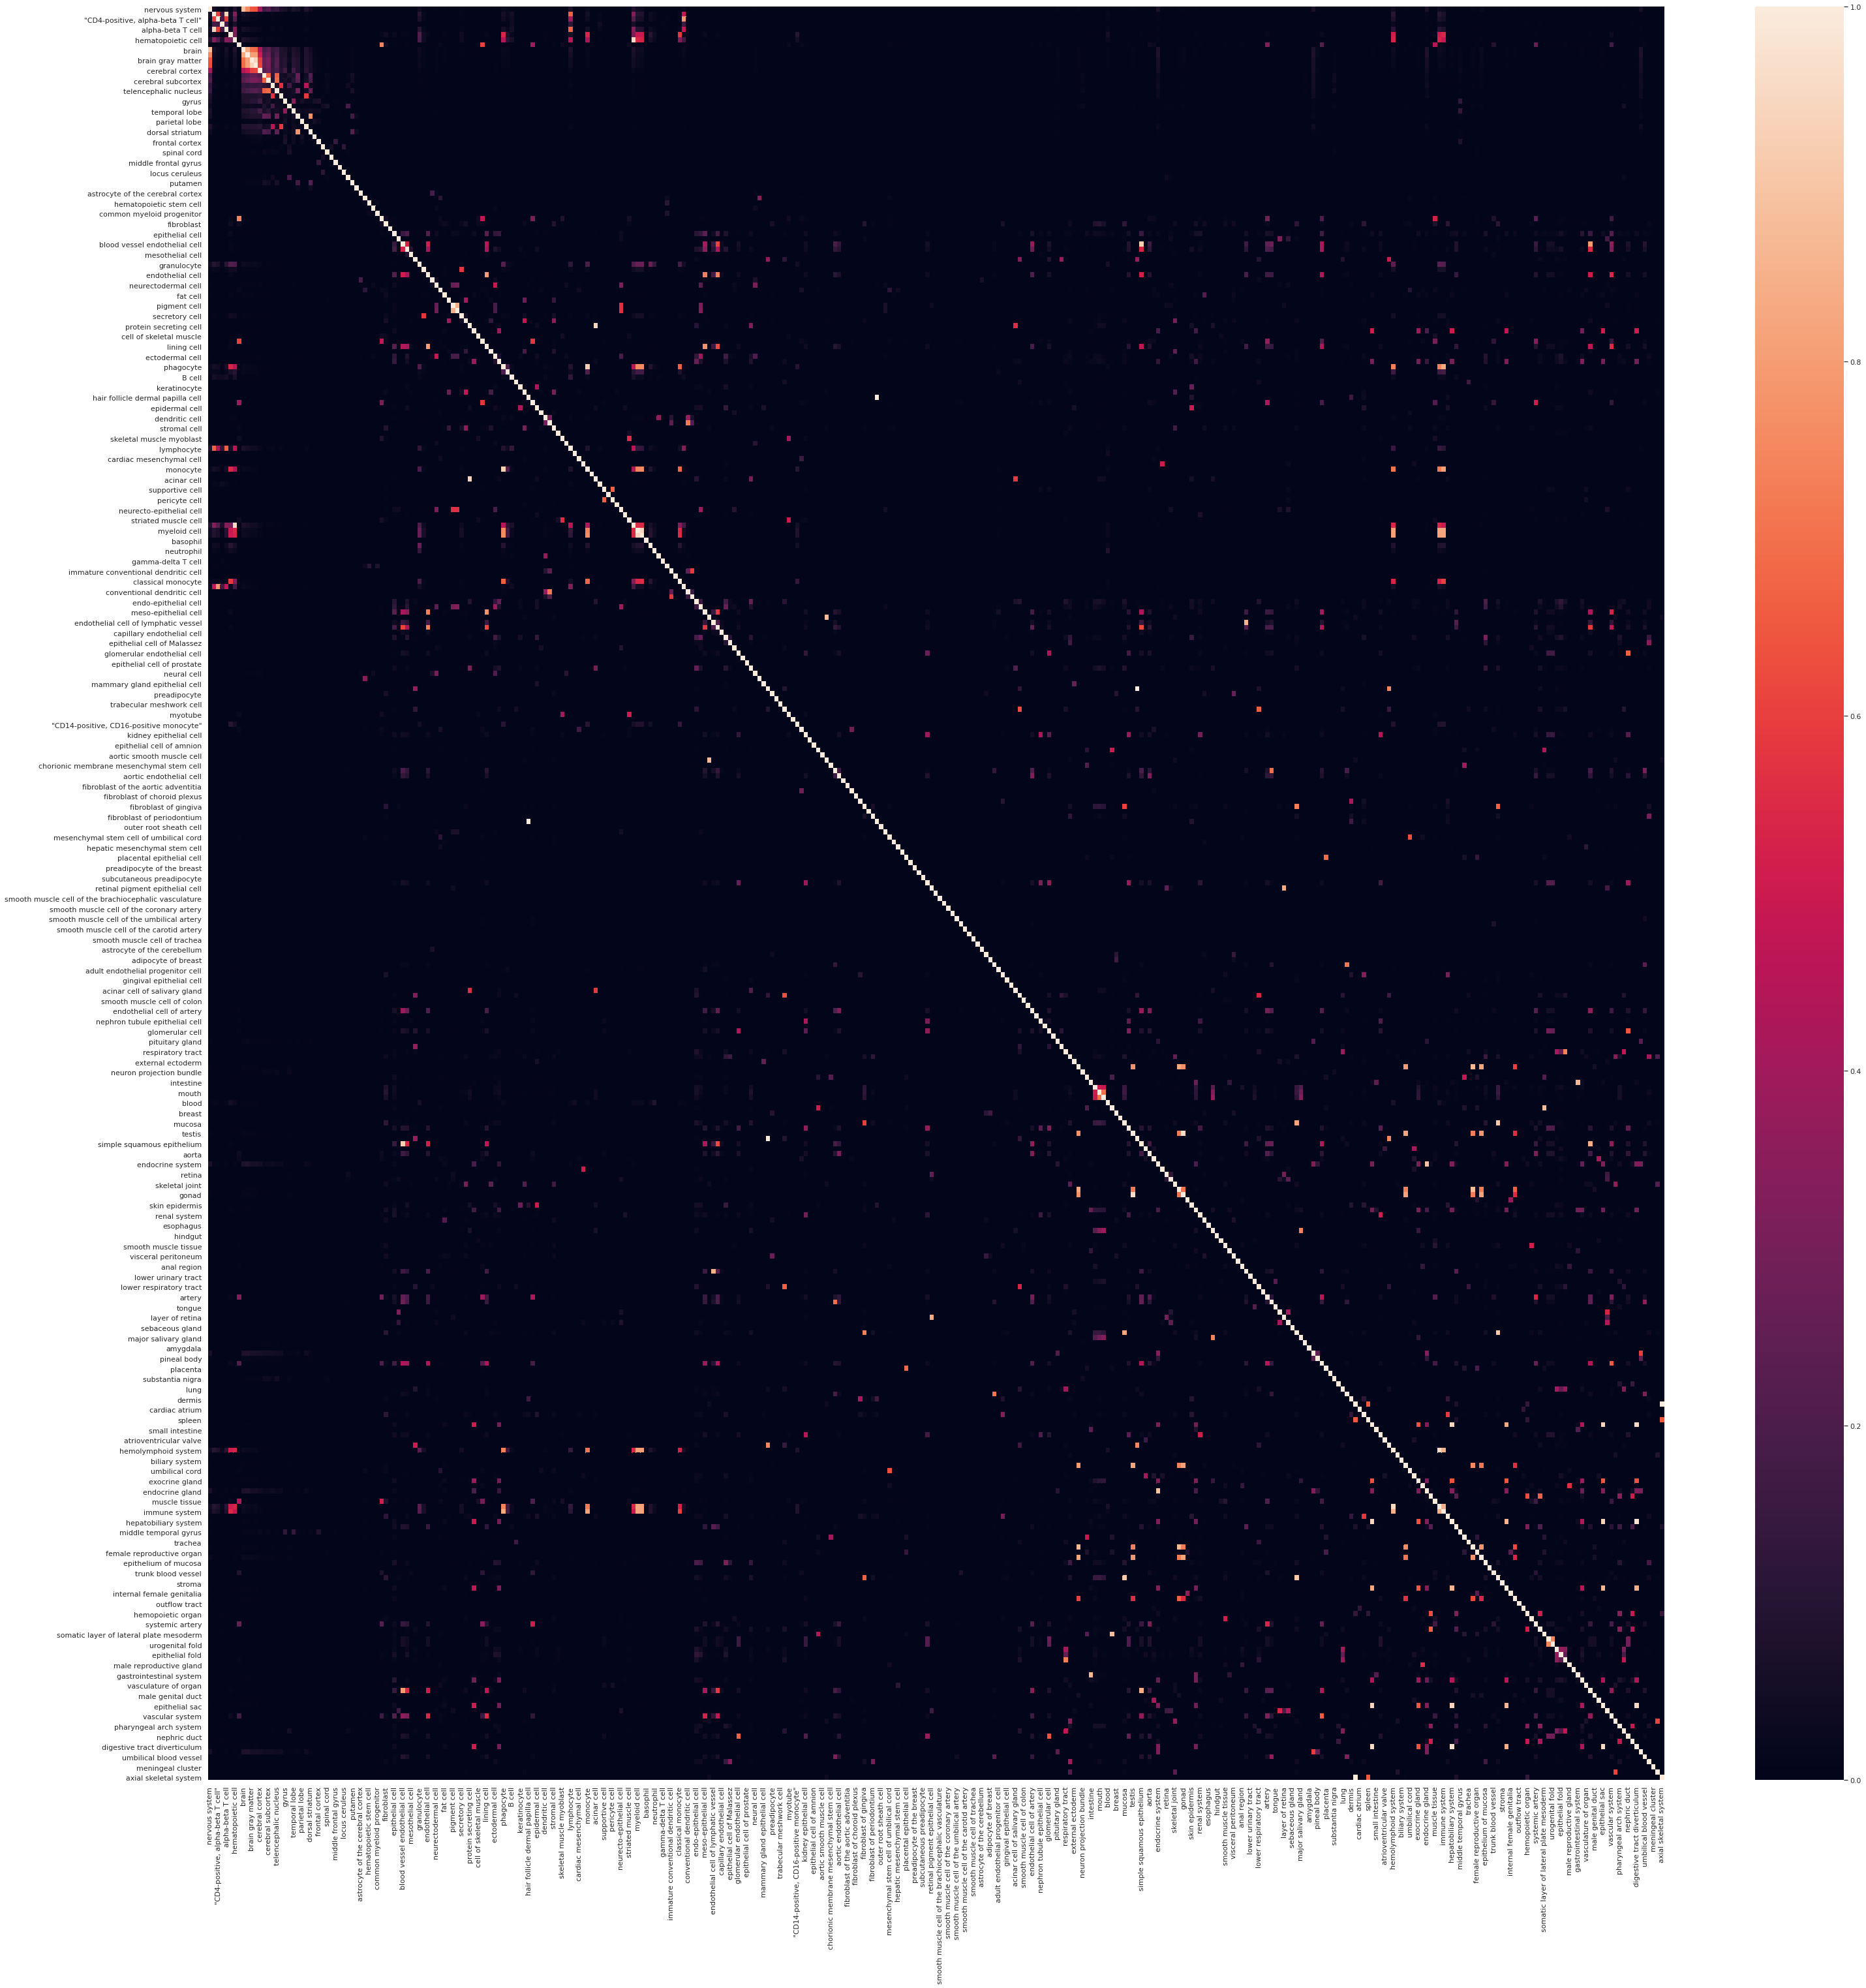

In [ ]:
fig, ax1 = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(tvst_df, ax=ax1)
# ax1 = sns.heatmap(tvst_df)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


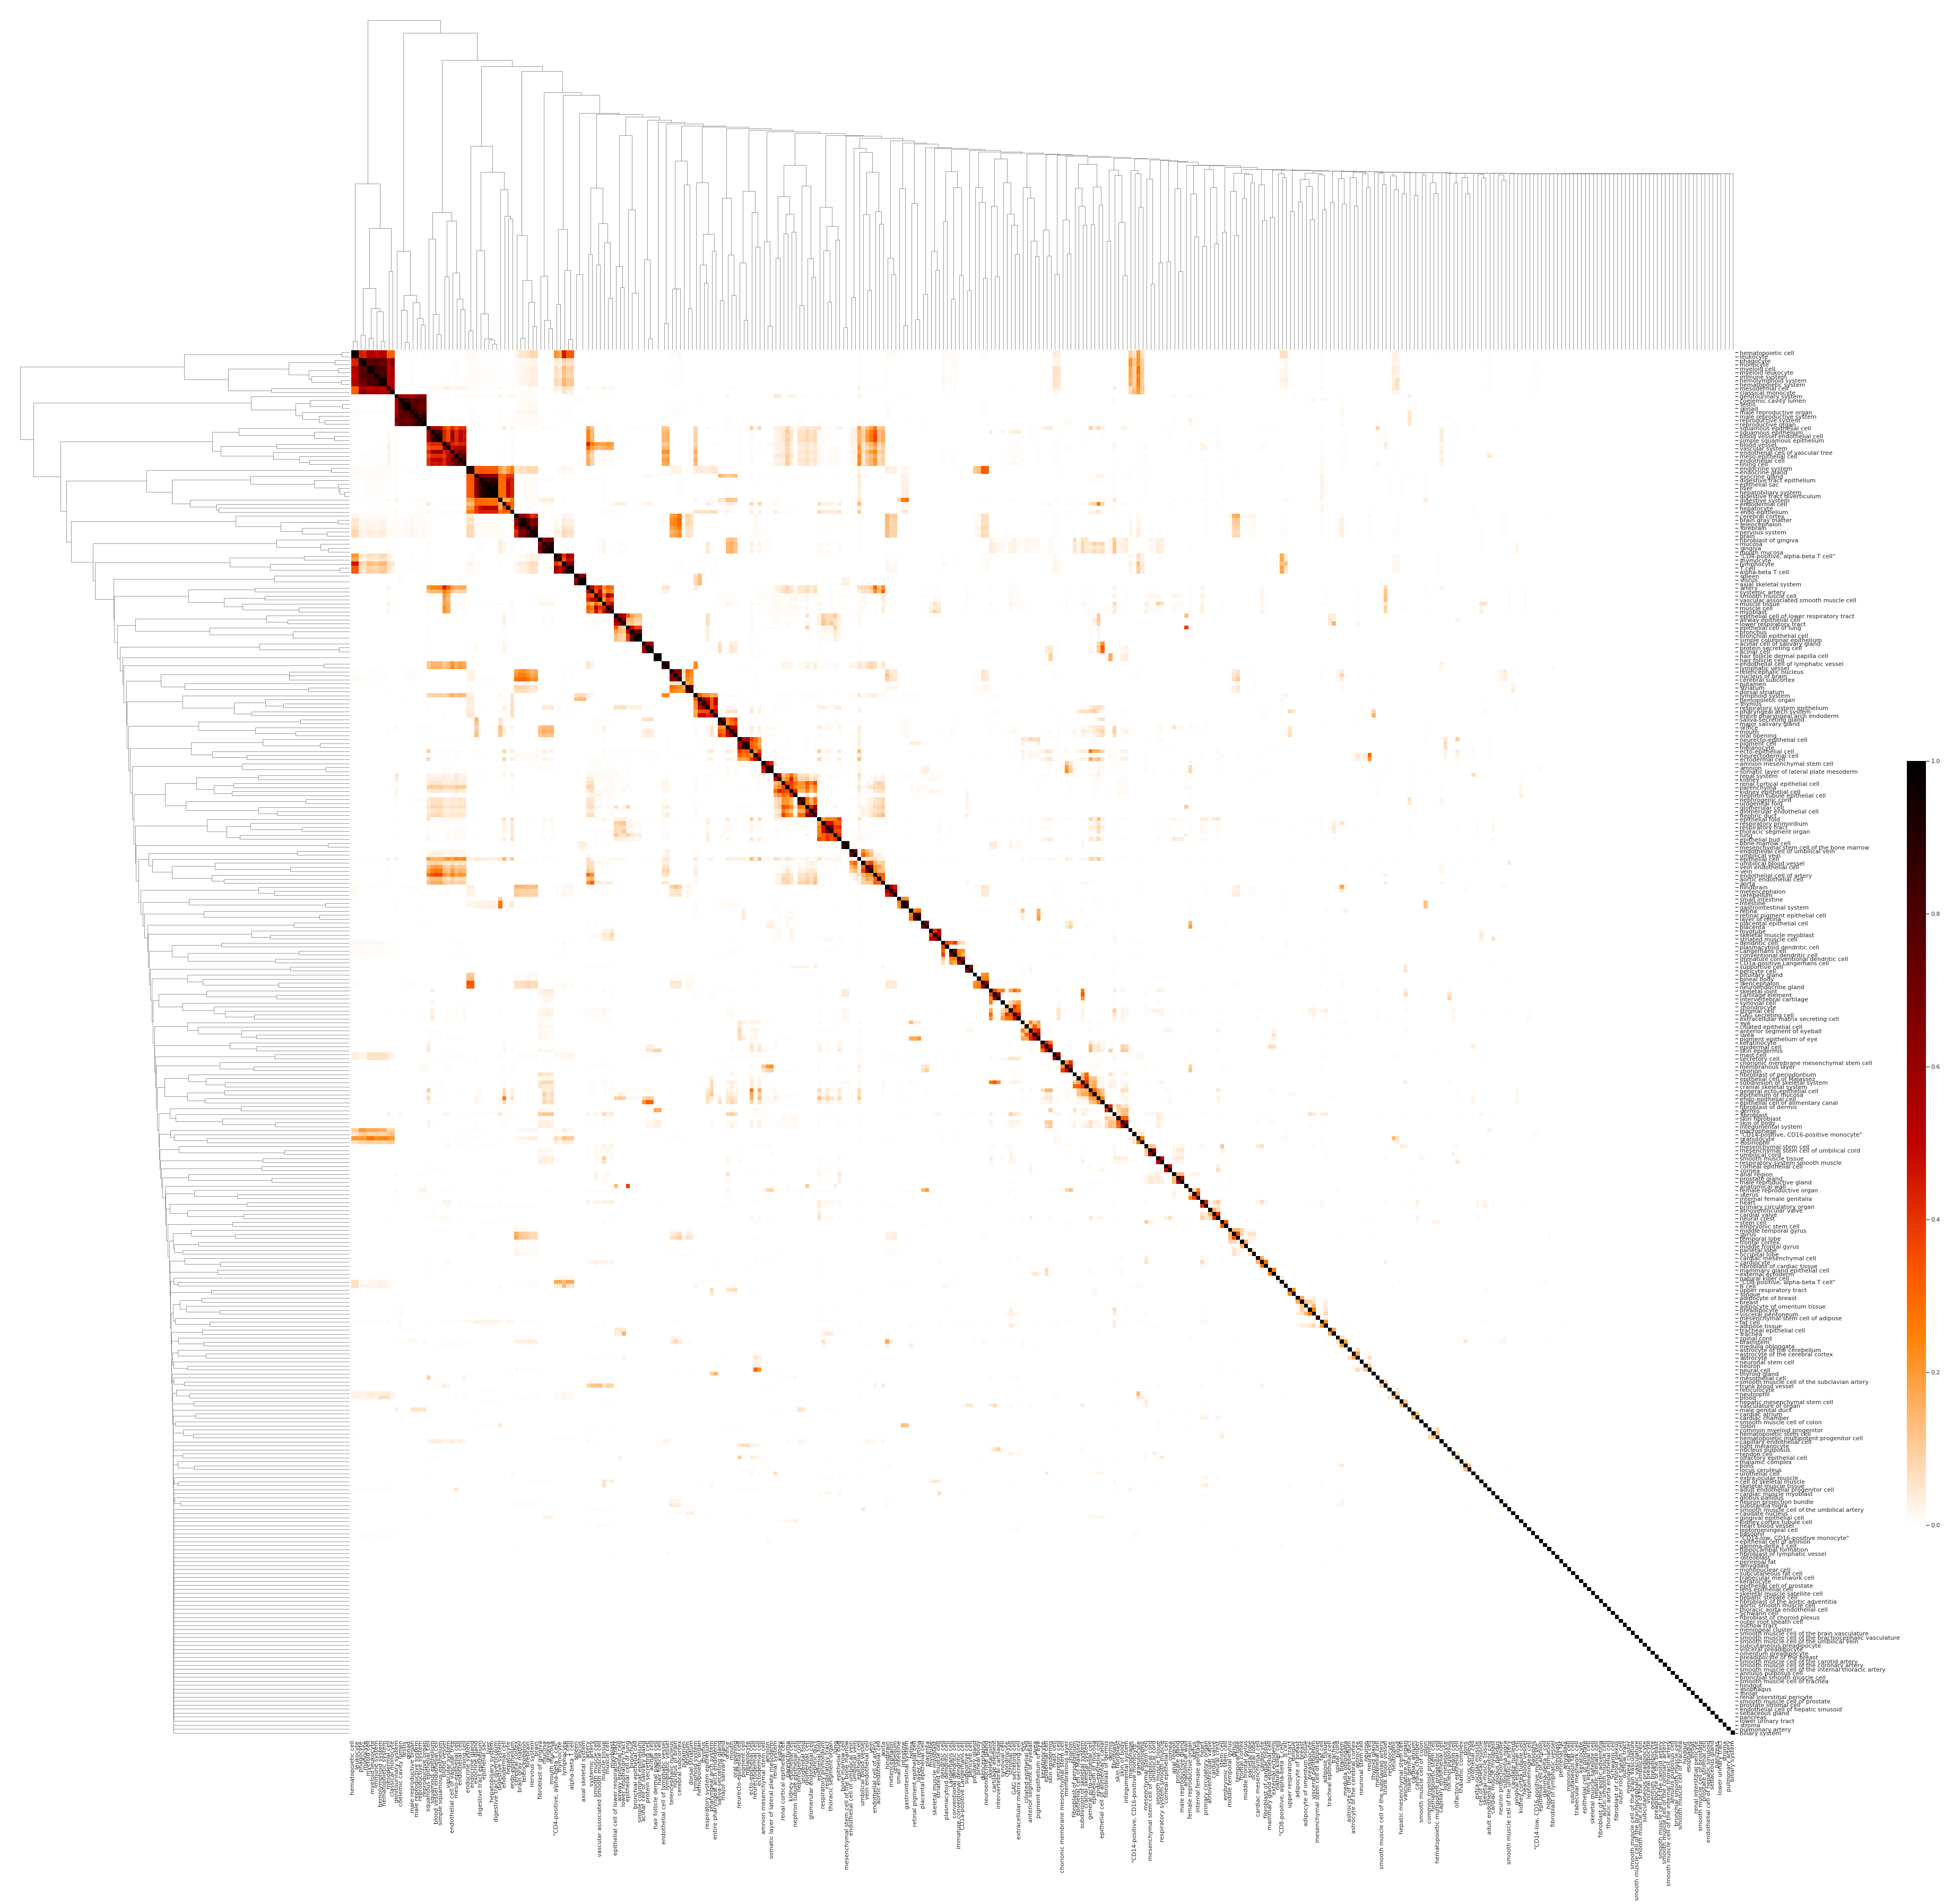

In [ ]:
#@title row & column cluster
from matplotlib import pyplot as plt
ax12 = sns.clustermap(tvst_df, cmap = 'gist_heat_r',
                     figsize=(50,50), 
                     cbar_pos=(1, .2, .01, .4), yticklabels=True, xticklabels=True)


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


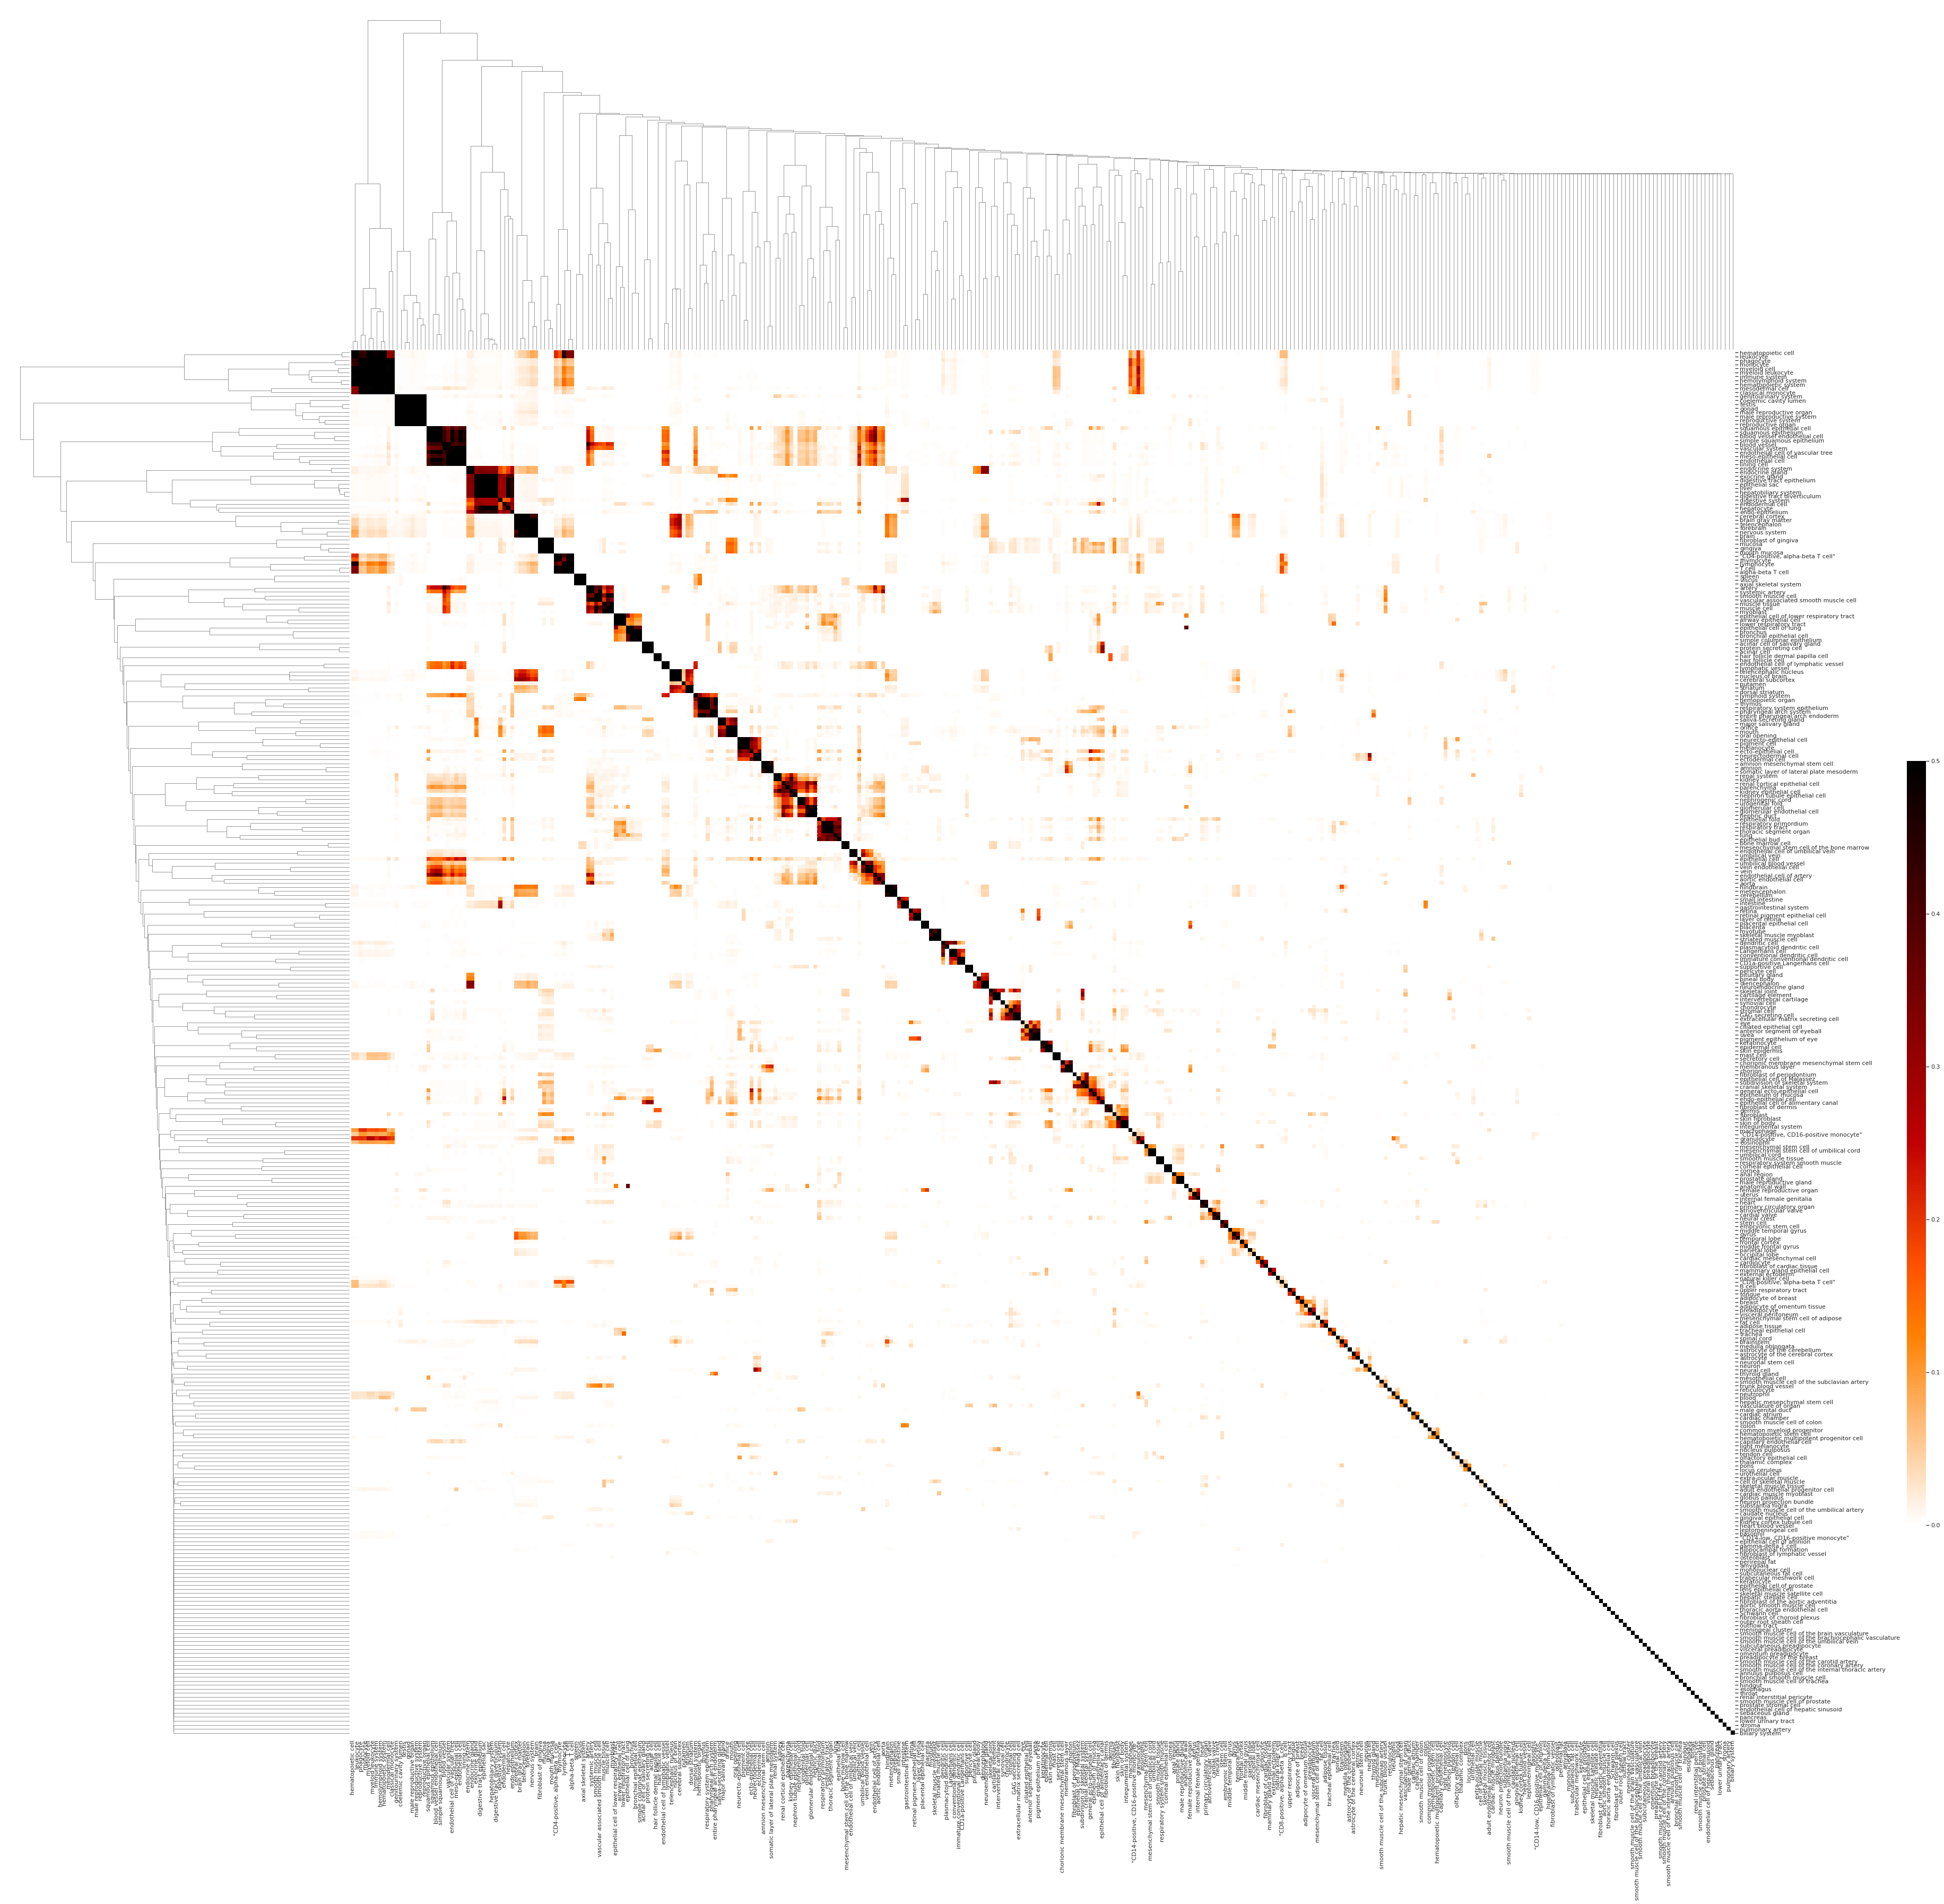

In [ ]:
#@title row & column cluster
from matplotlib import pyplot as plt
ax13 = sns.clustermap(tvst_df, cmap = 'gist_heat_r', vmax=0.5,
                     figsize=(50,50),
                     cbar_pos=(1, .2, .01, .4), yticklabels=True, xticklabels=True)


In [ ]:
sig_rate = 0.001

tvst_chi2 = pd.DataFrame(index=genes_pvalues.columns)
i = 0
with progressbar.ProgressBar(max_value=len(genes_pvalues.columns)** 2) as bar:
  
  for tissue1 in genes_pvalues.columns:
    TG = genes_pvalues.loc[:, tissue1]
    # print(TG)
    TS = TG[TG <= sig_rate]
    TSG1 = set(TS.index)
    # print(len(TSG1), TSG1)
    a = len(TSG1)
    t1 = len(TG)
    b = t1 - a
    # if len(TSG1) == 0:
    #   tvst_chi2.loc[tissue1, :] = 0#/ len(TS.index)
    #   tvst_chi2.loc[tissue1, tissue1] = 1
    #   continue
    for tissue2 in genes_pvalues.columns:
      i += 1
      bar.update(i)
      TG = genes_pvalues.loc[:, tissue2]
      TS = TG[TG <= sig_rate]
      TSG2 = set(TS.index)
      c = len(TSG2)
      t2 = len(TG)
      d = t2 - c
      try:
        tvst_chi2.loc[tissue1, tissue2] = \
        (((a * d - b * c)**2)*(t1 + t2))/(t1 * t2 * (a + c) * (b + d))

      except ZeroDivisionError:
        tvst_chi2.loc[tissue1, tissue2] = 10 ** 15
# tvst_chi2.to_excel(o_path + 'tissu_vs_tissue_percentage.xlsx')

  0% (79 of 120409) |                    | Elapsed Time: 0:00:00 ETA:   0:05:08


59110
0


  0% (461 of 120409) |                   | Elapsed Time: 0:00:01 ETA:   0:04:24


59110
0


  0% (786 of 120409) |                   | Elapsed Time: 0:00:01 ETA:   0:03:36


59110
0


  0% (1192 of 120409) |                  | Elapsed Time: 0:00:01 ETA:   0:03:12


59110
0


  1% (1497 of 120409) |                  | Elapsed Time: 0:00:02 ETA:   0:02:54


59110
0


  1% (1832 of 120409) |                  | Elapsed Time: 0:00:02 ETA:   0:02:36


59110
0


  1% (2226 of 120409) |                  | Elapsed Time: 0:00:03 ETA:   0:02:31


59110
0


  2% (2549 of 120409) |                  | Elapsed Time: 0:00:03 ETA:   0:02:30


59110
0


  2% (2878 of 120409) |                  | Elapsed Time: 0:00:04 ETA:   0:02:29


59110
0


  2% (3258 of 120409) |                  | Elapsed Time: 0:00:04 ETA:   0:02:29


59110
0


100% (120409 of 120409) |################| Elapsed Time: 0:00:04 Time:  0:00:04


KeyboardInterrupt: ignored

In [ ]:
0 ** 2

0

In [ ]:
tvst_chi2.to_excel(o_path + 'tissu_vs_tissue_X2.xlsx')

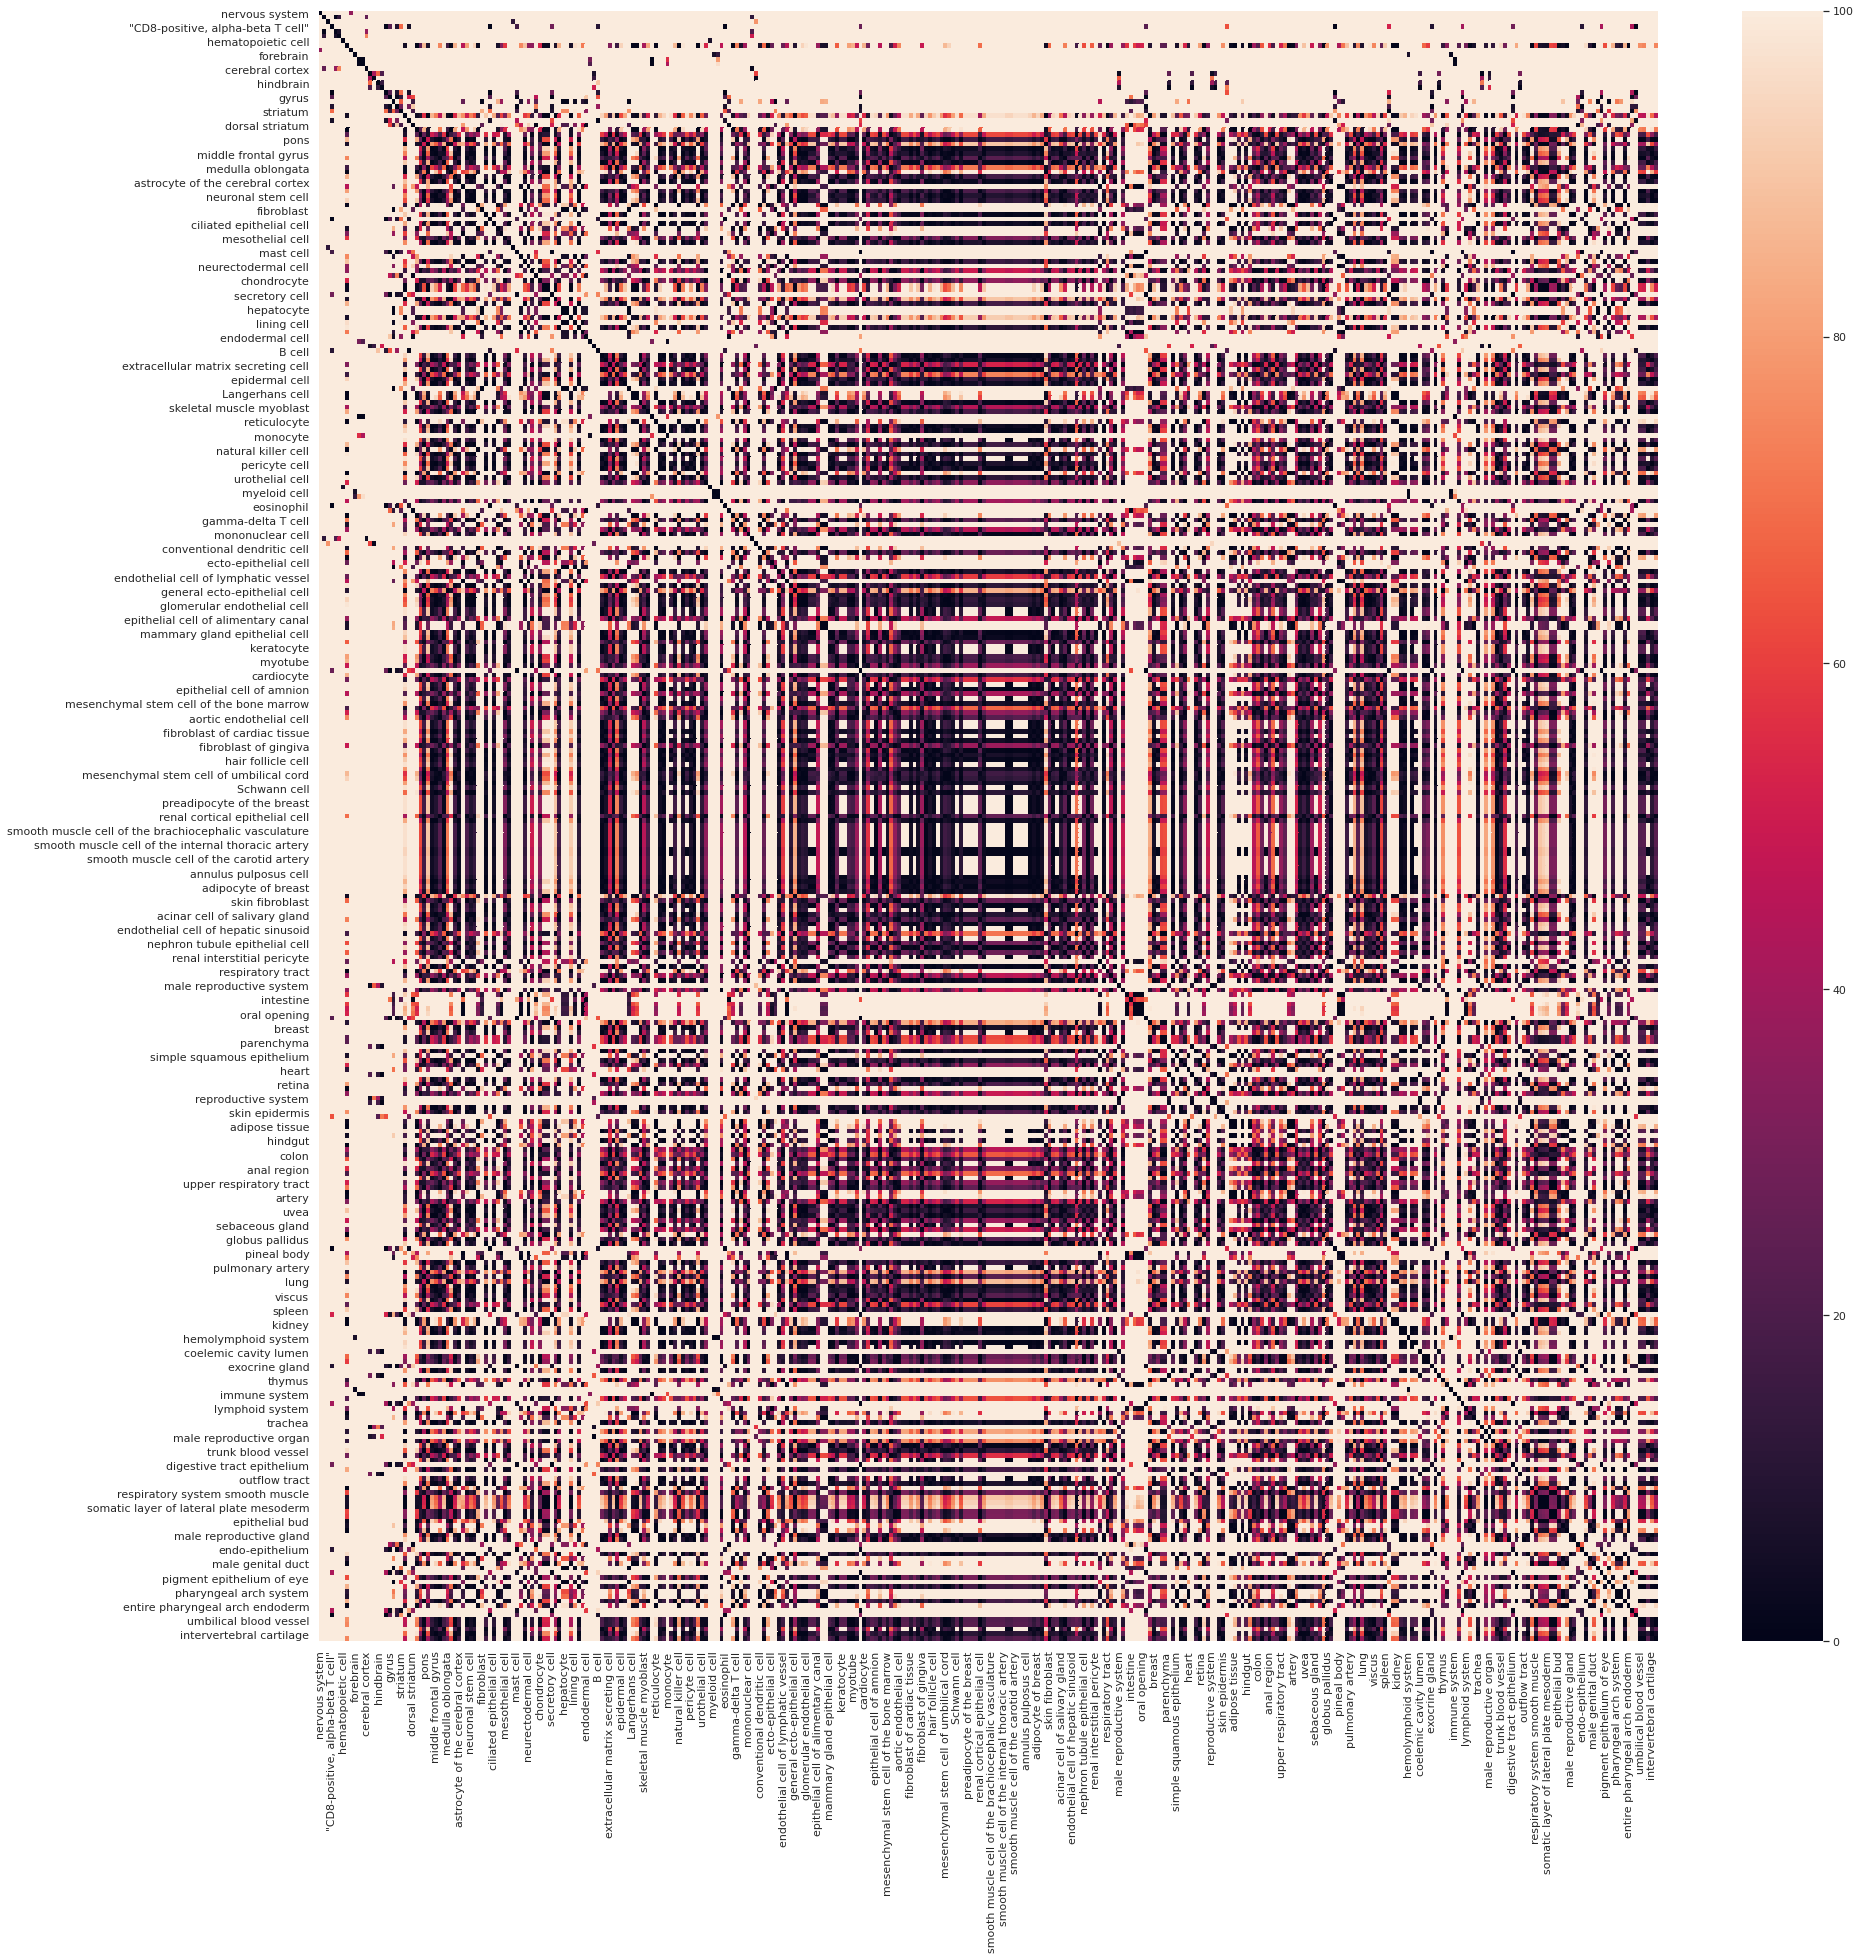

In [ ]:
fig, ax2 = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(tvst_chi2, ax=ax2, vmax = 100)

In [ ]:
tvst_chi2 = pd.read_excel(o_path + 'tissu_vs_tissue_X2.xlsx', index_col=0)

In [ ]:
#@title row & column cluster

ax22 = sns.clustermap(tvst_chi2, vmax = 100,
                     figsize=(347,347), 
                     cbar_pos=(1, .2, .01, .4))
# final_pvalues['NewIndex'] = None # Create new column, with only None values

# for indx, value in enumerate(ax22.dendrogram_row.reordered_ind):
#     final_pvalues['NewIndex'][value] = indx # Set index (List element number) to indx (Order in indices list)

# clustered_pvalues = final_pvalues.sort_values(by=['NewIndex'])
# clustered_pvalues.pop('NewIndex')
# final_pvalues.pop('NewIndex')
# clustered_columns = [clustered_pvalues.columns[i] for i in ax5.dendrogram_col.reordered_ind]
# clustered_pvalues = clustered_pvalues[clustered_columns]
# clustered_pvalues.to_excel(o_path + 'test/simple heatmap both'+'.xlsx')


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
